In [91]:
import pandas as pd

df = pd.read_csv('top_hollywood_grossing_movies.csv')

print("First 5 rows of the dataset:")
print(df.head())

# Display column names to verify correct loading
print("\nColumn names in the dataset:")
print(df.columns)

print("\nData Types:")
print(df.dtypes)  

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values Count:")
print(df.isnull().sum())



First 5 rows of the dataset:
   Unnamed: 0                                              Title  \
0           0  Star Wars: Episode VII - The Force Awakens (2015)   
1           1                           Avengers: Endgame (2019)   
2           2                                      Avatar (2009)   
3           3                               Black Panther (2018)   
4           4                      Avengers: Infinity War (2018)   

                                          Movie Info  \
0  As a new threat to the galaxy rises, Rey, a de...   
1  After the devastating events of Avengers: Infi...   
2  A paraplegic Marine dispatched to the moon Pan...   
3  T'Challa, heir to the hidden but advanced king...   
4  The Avengers and their allies must be willing ...   

                           Distributor       Release Date  \
0  Walt Disney Studios Motion Pictures  December 16, 2015   
1  Walt Disney Studios Motion Pictures     April 24, 2019   
2                Twentieth Century Fox  De

In [93]:
import ast
import re

movies_df = pd.read_csv("top_hollywood_grossing_movies.csv")


print(movies_df.head()) 
print(movies_df.columns)  

movies_df["Genre"] = movies_df["Genre"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith("[") else x)

# Convert list format back into a comma-separated string
movies_df["Genre"] = movies_df["Genre"].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)

# Verify if genres are now actually properly formatted
print(movies_df[["Title", "Genre"]].head())  


# Convert 'Movie Runtime' from hours and minutes to total minutes
def convert_runtime(runtime_str):
    match = re.search(r"(\d+)\s*hr\s*(\d*)\s*min?", str(runtime_str)) 
    if match:
        hours = int(match.group(1)) * 60  
        minutes = int(match.group(2)) if match.group(2) else 0  
        return hours + minutes
    return None  

# Apply conversion
movies_df["Run Time"] = movies_df["Movie Runtime"].apply(convert_runtime)

# Verify conversion
print(movies_df[["Title", "Run Time"]].head()) 



   Unnamed: 0                                              Title  \
0           0  Star Wars: Episode VII - The Force Awakens (2015)   
1           1                           Avengers: Endgame (2019)   
2           2                                      Avatar (2009)   
3           3                               Black Panther (2018)   
4           4                      Avengers: Infinity War (2018)   

                                          Movie Info  \
0  As a new threat to the galaxy rises, Rey, a de...   
1  After the devastating events of Avengers: Infi...   
2  A paraplegic Marine dispatched to the moon Pan...   
3  T'Challa, heir to the hidden but advanced king...   
4  The Avengers and their allies must be willing ...   

                           Distributor       Release Date  \
0  Walt Disney Studios Motion Pictures  December 16, 2015   
1  Walt Disney Studios Motion Pictures     April 24, 2019   
2                Twentieth Century Fox  December 16, 2009   
3  Walt Di

## Data Preprocessing: Genre Formatting & Runtime Conversion

This table shows the dataset after applying key preprocessing steps:

### **1. Genre Formatting**
- The original `"Genre"` column was stored as a string representation of a list (e.g., `['Action', 'Adventure', 'Sci-Fi']`).
- I **converted it into a clean comma-separated format for readability and analysis (e.g., `"Action, Adventure, Sci-Fi"`).
- This step ensures that one-hot encoding can be applied for further numerical processing.

### **2. Run Time Conversion**
- The `"Movie Runtime"` column originally contained values in hours and minutes format (e.g., `"2 hr 18 min"`).
- It has been converted into total minutes in a new `"Run Time"` column for easy numerical analysis.
  - Example: `"2 hr 18 min"` → `138 minutes`
  - Example: `"3 hr 1 min"` → `181 minutes`

### ** Why this would Matter here?**
- Standardizing runtime in minutes enables comparisons and visualizations.
- Formatting genres properly allows for genre-based revenue analysis.
- These preprocessing steps ensure the dataset is clean and ready for visualization and model training.

This transformation improves data consistency and prepares it for further analysis.


In [95]:
for x in df.index:
    release_date = str(df.loc[x, "Release Date"])  # Convert to string to handle NaNs
    if release_date != "nan":  
        year = release_date[-4:]  
        df.loc[x, "Release Date"] = year  
        df.loc[x, "Release Date"] = "Unknown"  # Placeholder for missing values

df

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,Unknown,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,Unknown,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,Unknown,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN
...,...,...,...,...,...,...,...,...,...,...,...
895,895,Beowulf (2007),The warrior Beowulf must fight and defeat the ...,Paramount Pictures,Unknown,82280579,114113166,196393745,"['Action', 'Adventure', 'Animation', 'Fantasy']",1 hr 55 min,PG-13
896,896,Bridge to Terabithia (2007),A preteen's life turns upside down when he bef...,Walt Disney Studios Motion Pictures,NaN,82272442,55314621,137587063,"['Drama', 'Family', 'Fantasy']",1 hr 36 min,NaN
897,897,The Pink Panther (2006),Bumbling Inspector Clouseau must solve the mur...,Sony Pictures Entertainment (SPE),Unknown,82226474,81889423,164115897,"['Adventure', 'Comedy', 'Crime', 'Mystery']",1 hr 33 min,PG
898,898,Teenage Mutant Ninja Turtles: Out of the Shado...,The Turtles get into another battle with their...,Paramount Pictures,Unknown,82051601,163572247,245623848,"['Action', 'Adventure', 'Comedy', 'Sci-Fi']",1 hr 52 min,PG-13


In [97]:
for x in df.index:
    time = 0
    data = str(df.loc[x, "Movie Runtime"]).split()  

    if len(data) == 2 and "hr" in data[1]:  
        time = int(data[0]) * 60 
    elif len(data) == 4 and "hr" in data[1] and "min" in data[3]:  
        time = (int(data[0]) * 60) + int(data[2])  
    else:
        time = None  

    df.loc[x, "Movie Runtime"] = time  
movies_df["Run Time"] = movies_df["Movie Runtime"].apply(convert_runtime)

print(movies_df[["Title", "Run Time"]].head()) 

# One-Hot Encoding for 'Genre'
genre_dummies = movies_df["Genre"].str.get_dummies(sep=", ")  # Handles multiple genres
movies_df = pd.concat([movies_df, genre_dummies], axis=1)

# Drop the original 'Genre' column
movies_df.drop(columns=["Genre"], inplace=True)

# Verify encoding
print(movies_df.head())  



                                               Title  Run Time
0  Star Wars: Episode VII - The Force Awakens (2015)    138.00
1                           Avengers: Endgame (2019)    181.00
2                                      Avatar (2009)    162.00
3                               Black Panther (2018)    134.00
4                      Avengers: Infinity War (2018)    149.00
   Unnamed: 0                                              Title  \
0           0  Star Wars: Episode VII - The Force Awakens (2015)   
1           1                           Avengers: Endgame (2019)   
2           2                                      Avatar (2009)   
3           3                               Black Panther (2018)   
4           4                      Avengers: Infinity War (2018)   

                                          Movie Info  \
0  As a new threat to the galaxy rises, Rey, a de...   
1  After the devastating events of Avengers: Infi...   
2  A paraplegic Marine dispatched to the moon

## Data Preprocessing and Transformation Overview

This table displays a preview of the dataset after preprocessing and feature engineering.

### **Key Transformations Applied:**
1.  Run Time Conversion: 
   - The "Movie Runtime" column originally stored values in hours and minutes (e.g., `"2 hr 18 min"`).
   - It has been converted into total minutes under the new column `"Run Time"` (e.g., `138 minutes`).
   - This allows for easier numerical analysis and comparisons.

2. One-Hot Encoding for "Genre":  
   - The "Genre" column originally contained a list of genres as a string (e.g., `"['Action', 'Adventure', 'Sci-Fi']"`).
   - Each unique genre has been converted into a separate binary column (`1` if the movie belongs to that genre, `0` otherwise).
   - Example:
     - `"Action" = 1`, `"Sci-Fi" = 1`, `"Drama" = 0` (for an action-sci-fi movie).

3. Revenue Breakdown: 
   - The dataset includes `"Domestic Sales (in $)"` and `"International Sales (in $)"`, which contribute to `"World Sales (in $)"`.
   - This helps analyze whether a movie earns more revenue domestically or internationally.

4. Additional Features:  
   - `"License"` column provides movie ratings (e.g., `"PG-13"`, `"R"`).
   - `"Distributor"` indicates the production company responsible for the movie.
   - `"Unnamed: 0"` is an index column (can be removed for clarity).

### **Insights:**
- Movies like Avengers: Endgame and Avatar have higher runtimes (~181 minutes).
- Most movies in this sample belong to the Action and Sci-Fi genres.
- The dataset is now structured for further analysis, visualization, and machine learning models.

This preprocessing ensures the dataset is clean, structured, and ready for analysis.


In [99]:
# Fill missing License values using hardcoded fixes
hardcoded_licenses = {
    "WALL·E (2008)": "G",
    "Les Misérables (2012)": "PG-13",
    "Pokémon Detective Pikachu (2019)": "PG",
    "Pokémon: The First Movie - Mewtwo Strikes Back (1998)": "G",
    "The Naked Gun 2½: The Smell of Fear (1991)": "PG-13"
}

for x in df.index:
    if df.loc[x, "Title"] in hardcoded_licenses:
        df.loc[x, "License"] = hardcoded_licenses[df.loc[x, "Title"]]

df["License"] = df["License"].fillna("Unknown")

# Check to see if License values were filled properly
print(df[["Title", "License"]].head(10))


                                               Title  License
0  Star Wars: Episode VII - The Force Awakens (2015)    PG-13
1                           Avengers: Endgame (2019)    PG-13
2                                      Avatar (2009)    PG-13
3                               Black Panther (2018)  Unknown
4                      Avengers: Infinity War (2018)  Unknown
5                     Spider-Man: No Way Home (2021)  Unknown
6                                     Titanic (1997)    PG-13
7                              Jurassic World (2015)    PG-13
8                                The Avengers (2012)    PG-13
9     Star Wars: Episode VIII - The Last Jedi (2017)    PG-13


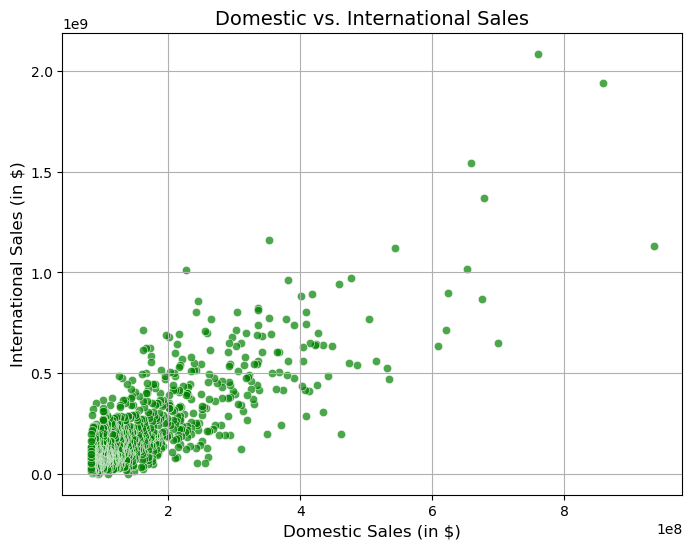

In [73]:
df["World Sales (in $)"] = df["World Sales (in $)"] / 1e9  

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Domestic Sales (in $)"], y=df["International Sales (in $)"], alpha=0.7, color="green")

plt.title("Domestic vs. International Sales", fontsize=14)
plt.xlabel("Domestic Sales (in $)", fontsize=12)
plt.ylabel("International Sales (in $)", fontsize=12)
plt.grid(True)
plt.show()


## Analysis of Domestic vs. International Sales

This scatter plot visualizes the relationship between Domestic Sales (in $) and International Sales (in $) for the highest-grossing Hollywood movies. 

### Key Observations:
- There is a positive correlation between domestic and international sales, indicating that movies that perform well domestically also tend to perform well internationally.
- Most movies have lower domestic sales compared to international sales, suggesting that international markets contribute significantly to total revenue.
- A few outliers exist where movies earned significantly higher international sales compared to their domestic performance.

### Business Insight:
For film producers, these insights highlight the importance of targeting international markets when planning marketing and distribution strategies, as they contribute heavily to overall revenue.


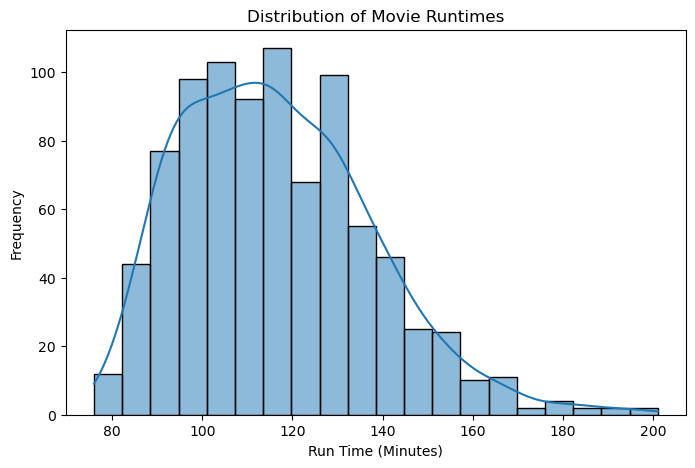

In [75]:
plt.figure(figsize=(8,5))
sns.histplot(movies_df["Run Time"], bins=20, kde=True)
plt.title("Distribution of Movie Runtimes")
plt.xlabel("Run Time (Minutes)")
plt.ylabel("Frequency")
plt.show()


## Distribution of Movie Runtimes

This histogram displays the distribution of movie runtimes in the dataset.

### **Key Observations:**
- The majority of movies have runtimes between 90 to 140 minutes.
- The distribution follows a roughly normal shape, with a peak around 110–120 minutes.
- A few movies exceed 160 minutes, but longer runtimes are relatively rare.

### **Insights:**
- Most movies are designed to fit within the 90–140 minute range, which aligns with industry standards for audience engagement.
- Outliers on the right side (above 180 minutes) may include epic films, extended cuts, or special releases**.

This analysis helps in understanding common runtime trends in the film industry.


In [77]:
pd.options.display.float_format = "{:,.2f}".format
df.describe()

,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $)
count,900.00,900.00,900.00,900.00
mean,449.50,"169,477,644.44","233,238,328.14",0.40
std,259.95,"104,342,081.50","218,539,337.67",0.31
min,0.00,"81,903,458.00",260.00,0.08
25%,224.75,"102,556,632.50","92,225,000.00",0.20
50%,449.50,"133,849,163.00","167,081,724.00",0.31
75%,674.25,"194,232,449.00","289,673,532.50",0.48
max,899.00,"936,662,225.00","2,086,738,578.00",2.85


In [23]:
df['World Sales (in $)'].describe()

count   900.00
mean      0.40
std       0.31
min       0.08
25%       0.20
50%       0.31
75%       0.48
max       2.85
Name: World Sales (in $), dtype: float64

In [25]:
new_df = df
Q1 = new_df['World Sales (in $)'].quantile(0.25)
Q3 = new_df['World Sales (in $)'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

data_no_outliers = new_df[(new_df['World Sales (in $)'] >= lower)  & (new_df['World Sales (in $)'] <= upper)]
data_no_outliers['World Sales (in $)'].describe()

count   838.00
mean      0.34
std       0.19
min       0.08
25%       0.20
50%       0.29
75%       0.43
max       0.90
Name: World Sales (in $), dtype: float64

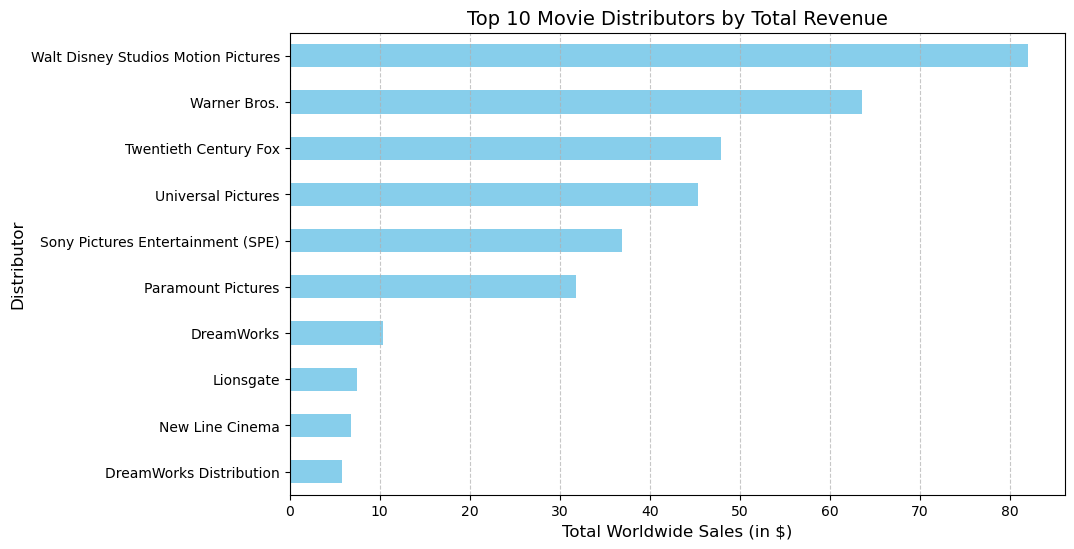

In [27]:
# bar chart that just shows the Top 10 Distributors by Total Revenue
top_distributors = df.groupby("Distributor")["World Sales (in $)"].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_distributors.sort_values().plot(kind="barh", color="skyblue")

plt.title("Top 10 Movie Distributors by Total Revenue", fontsize=14)
plt.xlabel("Total Worldwide Sales (in $)", fontsize=12)
plt.ylabel("Distributor", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


## Top 10 Movie Distributors by Total Revenue

This bar chart displays the top 10 movie distributors ranked by their total worldwide revenue. 

### Key Observations:
- Walt Disney Studios Motion Pictures dominates the industry with the highest total revenue.
- Warner Bros follows closely as the second-largest distributor.
- Other major players include Twentieth Century Fox, Universal Pictures, and Sony Pictures Entertainment (SPE).
- The distribution landscape is highly concentrated, with a few companies generating the majority of box office revenue.
- Smaller distributors such as Lionsgate, New Line Cinema, and DreamWorks Distribution** earn significantly less but still maintain a presence in the industry.

### Business Insight:
The dominance of a few key distributors highlights the competitive nature of the movie industry. Independent filmmakers looking to maximize revenue should consider partnering with top-tier distributors like Disney, Warner Bros., or Universal for wider market reach.


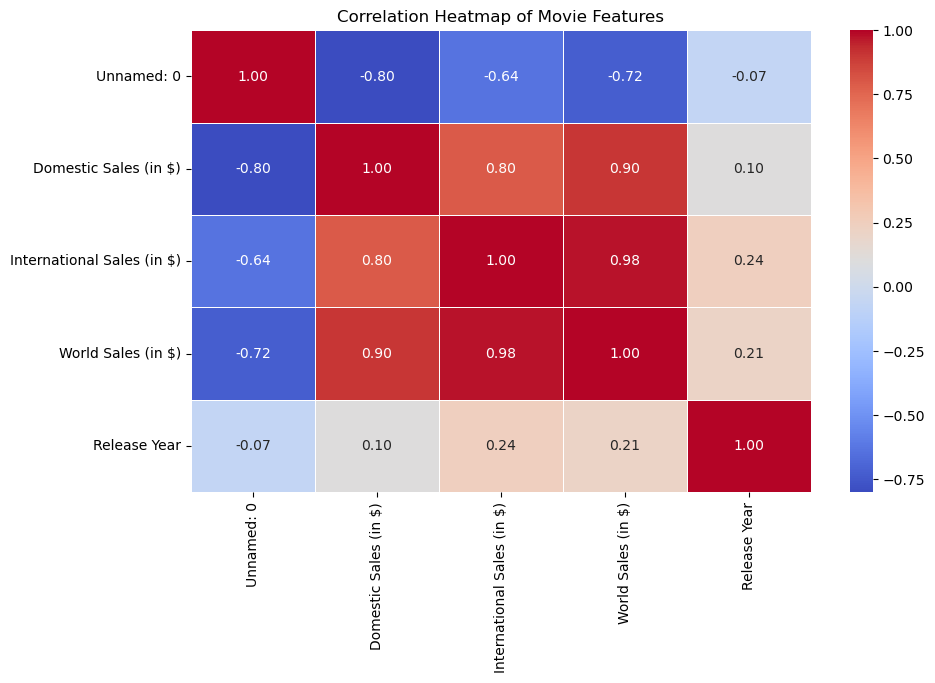

In [43]:
numeric_df = df.select_dtypes(include=["number"])  # This removes non-numeric columns

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Movie Features")
plt.show()


## Correlation Heatmap of Movie Features

### Why This Graph is Important
This heatmap visualizes the relationships between numerical movie attributes.  
By analyzing correlation values, we can:
- Identify strong relationships between revenue streams.
- Understand how different financial metrics interact.
- Determine whether certain features impact sales performance.

### **Key Insights**
   Strong Correlation Between International and Worldwide Sales (`0.98`)  
   - This confirms that international earnings significantly contribute to total revenue.  
   - The higher the international sales, the higher the worldwide total.  

   Domestic Sales are also highly correlated with Worldwide Sales (`0.90`)  
   - This means both domestic and international markets play crucial roles in box office success.  
   - However, international markets have a slightly higher influence, as seen in the stronger correlation.

   Release Year has a weak correlation with sales
   - This suggests that newer movies don’t necessarily earn more.
   - External factors like franchise popularity, marketing, and economic trends likely impact revenue more.

The heatmap confirms that the global revenue streams are interconnected and that both domestic and international markets play major roles in determining a movie’s success.  
It also shows that release year alone is not a strong predictor of sales, reinforcing the need for deeper feature analysis.

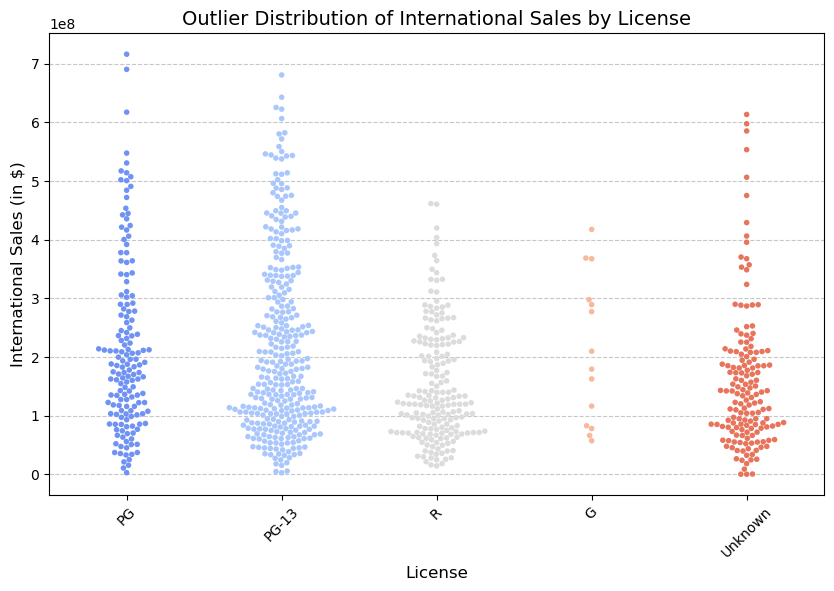

In [29]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x="License", y="International Sales (in $)", hue="License", data=data_no_outliers, palette="coolwarm", size=4, legend=False)

plt.title("Outlier Distribution of International Sales by License", fontsize=14)
plt.xlabel("License", fontsize=12)
plt.ylabel("International Sales (in $)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()



## Outlier Distribution of International Sales by License

This scatter plot visualizes the distribution of international sales based on movie license ratings (PG, PG-13, R, G, and Unknown). It helps identify outliers and trends across different rating categories.

### Key Observations:
- PG-13 and PG movies tend to have the highest international sales, with multiple outliers exceeding $500M.
- R-rated movies generally have lower international sales compared to PG and PG-13, though some exceptions exist.
- G-rated movies have fewer data points, suggesting that fewer movies in this category achieve high box office earnings internationally.
- The "Unknown" category shows a wide spread in revenue, possibly due to missing or inconsistent rating data.

### Business Insight:
This analysis suggests that PG-13 and PG movies are the most successful internationally, likely due to their broader audience appeal. Movie studios looking to maximize global revenue may benefit from targeting these rating categories.


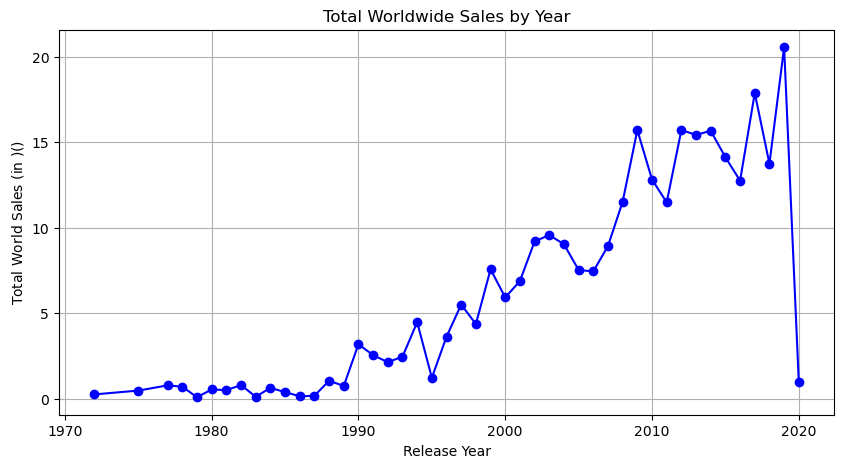

In [79]:
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")
df["Release Year"] = df["Release Date"].dt.year

for col in df.columns:
    if "world" in col.lower() and "sales" in col.lower():
        world_sales_col = col  # Assigns the correct column dynamically
        break
else:
    raise KeyError("Could not find the 'World Wide Sales' column. Check dataset headers.")

yearly_revenue = df.groupby("Release Year")[world_sales_col].sum()

plt.figure(figsize=(10, 5))
plt.plot(yearly_revenue.index, yearly_revenue.values, marker="o", linestyle="-", color="b")

plt.title("Total Worldwide Sales by Year")
plt.xlabel("Release Year")
plt.ylabel(f"Total {world_sales_col} ($)")
plt.grid(True)
plt.show()



In [37]:
num_movies_2020 = df[df["Release Year"] == 2020].shape[0]
print(f"Number of movies released in 2020: {num_movies_2020}")


Number of movies released in 2020: 3


###  Total Worldwide Sales by Year

#### Why This Graph is Important
This graph shows how global box office earnings have changed over the years.

#### Key Insights
- From 1990 to 2019, the movie industry experienced a very steady revenue growth.
- The spike in the 2000s aligns with globalization and streaming deals.
- The sharp drop in 2020 is not due to declining audience interest  but rather limited movie releases likely caused by COVID-19.


